# Assignment #1 - Question A
## Akira Aida - 100526064

## Question A.1
[10] Plot the contour​ ​plot​ of h(x,y), g(x,y), and finally f(x,y). Be sure to include the origin.

---

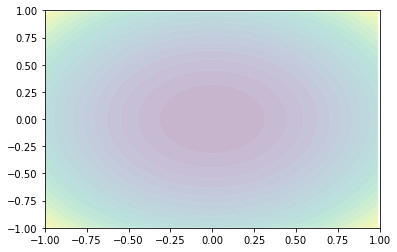

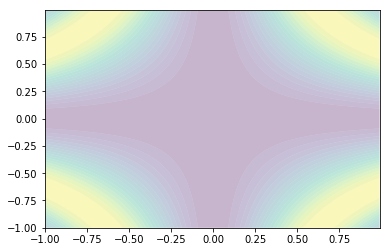

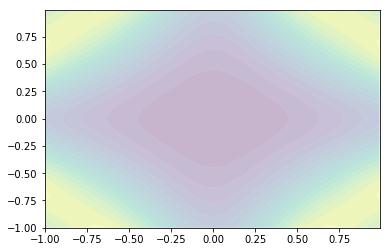

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x_vals = np.arange(-1, 1, 0.01)
y_vals = np.arange(-1, 1, 0.01)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)

plt.xlim(-1, 1)
plt.ylim(-1, 1)

h_func = np.power(x_mesh, 2) + np.power(y_mesh, 2)
plt.contourf(x_mesh, y_mesh, h_func, 20, alpha=0.3, antialiased=1)
plt.show()

g_func = np.sin(5*x_mesh*y_mesh - np.pi/2) + 1
plt.contourf(x_mesh, y_mesh, g_func, 20, alpha=0.3, antialiased=1)
plt.show()

f_func = h_func + g_func
plt.contourf(x_mesh, y_mesh, f_func, 20, alpha=0.3, antialiased=1)
plt.show()

## Question A.2
[10] Plot the wireframe​ ​surface​ ​plots​ for h, g and f. Be sure to include the origin.

---

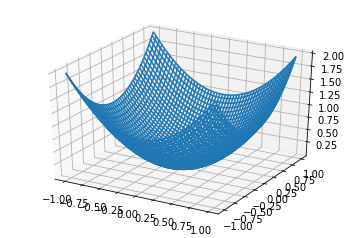

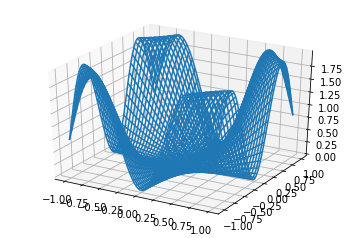

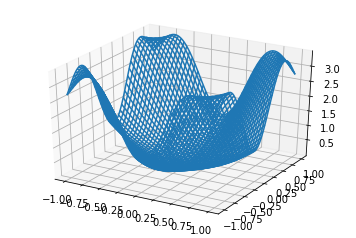

In [4]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')
axis.plot_wireframe(x_mesh, y_mesh, h_func)
plt.show()

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')
axis.plot_wireframe(x_mesh, y_mesh, g_func)
plt.show()

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')
axis.plot_wireframe(x_mesh, y_mesh, f_func)
plt.show()

## Question A.3
[10] What are the global minima of h(x,y) and g(x,y), and f(x,y)? Explain.

---

The global minima of h(x,y), g(x,y), and f(x,y) are all (0,0).
This can be shown in the contour plots for A.1 that the cooler colours are around (0,0).
As well as in the wireframe plots which show around (0,0), that it is at it's lowest point (in the plotted axes).

Also by taking the derivative of each function, you can find that there is a critical point at (0, 0) for each function which must be a minimum or maximum. Which is a sign that this is the global minimum.

Also by substituting numbers in for x and y, I could not get a value below 0 for all 3 functions.

---

### Function h(x,y)
h_func = x^2 + y^2

##### Derivative with respect to x
h_func/dx = 2*x

##### Solving for x
2*x = 0

-> x = 0

##### Derivative with respect to y
h_func/dy = 2*y

##### Solving for y
2*y = 0

-> y = 0

##### Critical point for h(x,y)
Critical point at (0,0)

---

### Function g(x,y)
g_func = sin(5*x*y - pi/2) + 1

##### Derivative with respect to x
g_func/dx = cos(5*x*y - pi/2) * 5*y

##### Solving for y
cos(5*x*y - pi/2) * 5*y = 0

-> 5*y = 0

-> y = 0

##### Derivative with respect to y
g_func/dy = cos(5*x*y - pi/2) * 5*x

##### Solving for x
cos(5*x*y - pi/2) * 5*x = 0

-> 5*x = 0

-> x = 0

##### Critical point for g(x,y)
Critical point at (0,0)

---

### Function f(x,y)
f_func = x^2 + y^2 + sin(5*x*y - pi/2) + 1

##### Derivative with respect to x
f_func/dx = 5*y*sin(5*x*y) + 2*x

##### Derivative with respect to y
f_func/dy = 5*x*sin(5*x*y) + 2*y

##### Critical point for f(x,y)
Solving this is non-trivial so I entered it into wolfram alpha to find the critical points.
A critical point is at (0,0)

## Question A.4
[10] Write a numpy-driven code to numerically solve for the minimum of f(x, y).
Start the initial value at (x, y) = (0.5, 0.5)

---

In [5]:
x = np.array([0.5, 0.5])
eps = np.array([0.001, 0.001])
alpha = 0.005

while(True):
    gradient = np.array([5*x[1]*np.sin(5*x[0]*x[1]) + 2*x[0], 5*x[0]*np.sin(5*x[0]*x[1]) + 2*x[1]])
    diff = x - alpha*gradient
    x = x - diff
    if diff[0] <= eps[0] and diff[1] <= eps[1]:
        break

print("The value of x converges closer and closer to (0,0).\nBy decreasing the value of epsilon, it will just get closer to (0,0).\n")
print(x)

The value of x converges closer and closer to (0,0).
By decreasing the value of epsilon, it will just get closer to (0,0).

[  1.69222461e-06   1.69222461e-06]


## Question A.5
[10] If you restrict the learning to 1000 iterations, plot the precision of your solver with the global
minimum in (3) with respect to the learning rate.

---

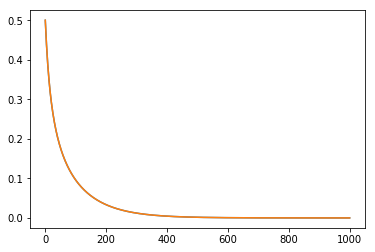

In [6]:
x = [[0.5, 0.5]]
alpha = 0.005

for i in range(1000):
    gradient = np.array([5*x[i][1]*np.sin(5*x[i][0]*x[i][1]) + 2*x[i][0], 5*x[i][0]*np.sin(5*x[i][0]*x[i][1]) + 2*x[i][1]])
    diff = x[i] - alpha*gradient
    diff = diff.tolist()
    x.append([diff[0], diff[1]])
    
plt.plot(x)
plt.show()

## Question A.6
[10] Explain your observation in (5).

---

For the plot in A.5, as the number of iterations increases. The values for both x and y converge to (0,0) at the same rates. It gets to the point where the rounding will start rounding the values for (x,y) to (0,0). The speed of which it converges is dependant on the learning rate; the smaller the learning rate, the more iterations it takes.